# Sales Analysis for 2019

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Merging the 12 Sales files into one file

In [2]:
files = [f for f in os.listdir('./Sales_Data')]
all_months = pd.DataFrame()
for i in files:
    df = pd.read_csv('./Sales_Data/' + i)
    all_months = pd.concat([all_months, df])
all_months.to_csv('all_data.csv', index = False)

In [3]:
df = pd.read_csv('all_data.csv')

#### Add and remove necessary columns to make analysis simpler

#### Remove Nan Values

In [4]:
df = df.dropna(how = "all")
df = df[df['Order Date'].str[0:2] != 'Or']

In [5]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [6]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
print(df.shape)
df.dtypes

(185950, 7)


Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [7]:
df['Day Total'] = df['Quantity Ordered'] * df['Price Each']
#df.head()

In [8]:
df.groupby('Month').sum()
    

,Quantity Ordered,Price Each,Day Total
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Adding a city column

In [9]:
# def get_city(addy):
#     return addy.split(',')[1].strip(" ")
def get_state(addy):
    return addy.split(',')[2].split(" ")[1]
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip(' ')} ({get_state(x)})")
#df.head()

### Adding date & time formatting

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Count'] = 1
#df.head()

### Question 1: What was best month for sales? How much was earned? 

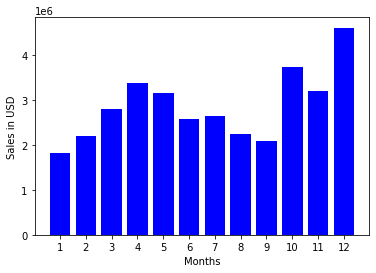

In [11]:
months = range(1,13)
results = df.groupby('Month').sum()
plt.bar(months, results['Day Total'], color = 'blue')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### December was the best month for sales reaching just over 4M USD

    The reason for this may be because of Christmas. 

## Which city had the highest number of Sales

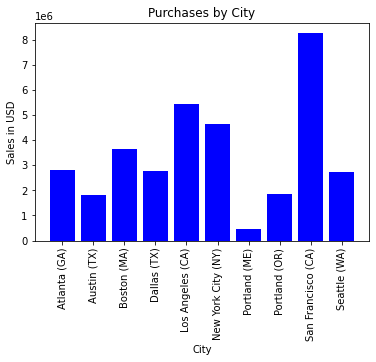

In [12]:
cities = [city for city, df in df.groupby(['City'])]
plt.bar(cities, df.groupby('City').sum()['Day Total'], color = 'blue')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.title('Purchases by City')
plt.show()

##### San Francisco had the highest amount of sales reaching over 8M
    
    The reason being San Francisco is a relativley tech progressive area, as well as having a younger and mroe wealthy population
    

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

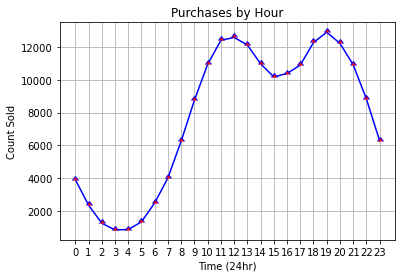

In [13]:
best_hour = df.groupby('Hour').count()['Count']
hours = [hour for hour, df in df.groupby(['Hour'])]
plt.plot(hours, best_hour, marker = 10, color = 'blue', markerfacecolor = 'red')
plt.xlabel('Time (24hr)')
plt.ylabel('Count Sold')
plt.grid()
plt.xticks(hours)
plt.title('Purchases by Hour')
plt.show()

##### The best time to display advertisements would be around 7 P.M. (19:00), and a close second to that would be 11 A.M. (11:00)

## What products are most often sold together?

In [14]:
df2 = df[df['Order ID'].duplicated(keep = False)]
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()


<ipython-input-14-f9d65ef67c59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [15]:
from itertools import combinations
from collections import Counter

count = Counter()
for i in df2['Grouped']:
    i_list = i.split(',')
    count.update(Counter(combinations(i_list,2)))
for i, j in count.most_common(5):
    print(i, j)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


##### iPhone & Lightning Charging Cable are most often sold together

### What product sold the most? Why do you think it sold the most?

In [16]:
prod_df = df.groupby('Product')
quant = prod_df.sum()['Quantity Ordered']

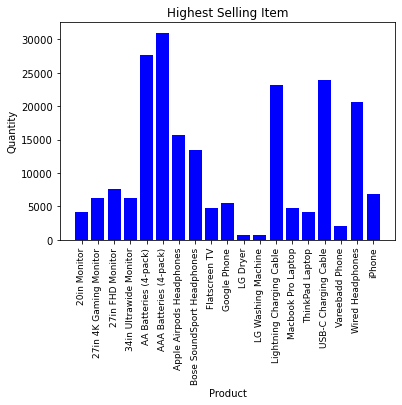

In [17]:
#df.groupby('Product').count()['Count']
x_val = [item for item, df in prod_df]
plt.bar(x_val, quant, color = 'blue')
plt.xlabel('Product')
plt.ylabel('Quantity')
#plt.grid()
plt.xticks(x_val, rotation = 'vertical', size = 9)
plt.title('Highest Selling Item')
plt.show()

##### AAA Batteries sold the most

[]

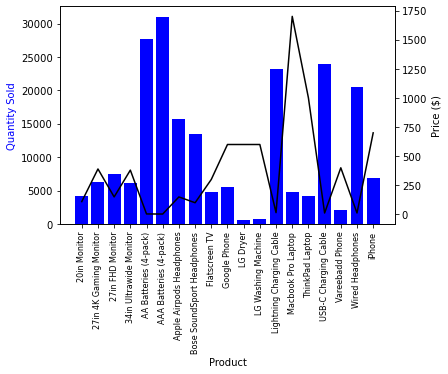

In [18]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x_val, quant, color='b')
ax2.plot(x_val, prices, color='black')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='b')
ax2.set_ylabel('Price ($)', color='black')
ax1.set_xticklabels(x_val, rotation='vertical', size=8)
#ax2.set_yticklabels ()
plt.plot()